# VoiceID: Customer verification with voice

Author: Dolgor Purbueva

## Project Overview

The goal of this project is to develop a voice-based client verification system for a digital bank, leveraging machine learning to enhance security and client authentication process. The system will verify clients by identifying PIN from speech and analyzing their unique vocal patterns during authentication with PIN that was prerecorded during enrollment.

The project will utilize CNN machine learning algorithm to classify whether a PIN is correct and a given voice belongs to a registered client or not. Key features of the dataset include audio recordings, which will be converted into waveforms for processing. The primary metric for evaluating the effectiveness of the verification system will be accuracy. We will also take into account precision, recall, and F1-score, which will help in assessing the models performance.

The development process will involve data preprocessing, feature engineering, exploratory data analysis, and the implementation of a Convolutional Neural Network (CNN) to classify the voices. The outcome of this project is expected to provide a secure client verification system based on voice that enhances the security of the digital bank.

![Alt text](images/image1.png)

## Business Understanding

Voice authentication, or voice biometrics, is rapidly becoming one of the most advanced and secure methods of user authentication. In the digital banking world, where security breaches and fraud can have significant financial and reputational impacts, voice authentication offers a powerful solution. By leveraging the unique characteristics of an individual’s voice, this technology adds a strong layer of protection, reducing the risks associated with traditional methods like passwords or PINs.

For instance, [HSBC UK saw a 50% drop in telephone fraud after implementing voice biometrics](https://www.about.hsbc.co.uk/news-and-media/hsbc-uks-voice-id-prevents-gbp249-million-of-attempted-fraud), highlighting the tangible benefits of this technology in reducing fraudulent activities. Additionally, adopting such advanced security measures can differentiate companies in competitive markets, further strengthening their brand reputation and customer trust.

## Stakeholder

The primary stakeholder for this project is [Revolut](https://en.wikipedia.org/wiki/Revolut), a global neobank and financial technology company headquartered in London, UK. Revolut offers a wide range of banking services for both retail customers and businesses, all through its online platform. Unlike traditional banks, Revolut operates entirely through digital channels, without physical branch networks.

Currently, Revolut clients use a combination of PINs, passcodes, and biometric methods (such as fingerprint or facial recognition) for authentication in the mobile app. When logging into the web app, Revolut employs two-factor authentication (2FA) through push notifications or SMS.

For an online bank like Revolut, ensuring the security of client accounts is paramount. As there are no physical branches for face-to-face verification, digital security measures must be highly robust to protect against fraud and unauthorized access. With the increasing sophistication of cyberattacks, enhancing security through voice-based client verification adds an extra layer of protection. This method is not only user-friendly but also difficult to replicate, making it a valuable tool in safeguarding clients' financial information. By adopting voice verification, Revolut can strengthen its security infrastructure, improve customer trust, and reduce the risk of fraud.


![Alt text](images/image2.png)

## Why Voice Authentication is a Good Idea for Revolut

* Enhanced Security and Fraud Prevention: Voice authentication uses unique biometric markers, making it harder to replicate than PINs or passwords.
* Improved Customer Trust and Satisfaction: Voice authentication is quick and convenient, improving user experience.
* Operational Efficiency and Cost Savings: Reducing reliance on traditional security methods can lower fraud investigation costs and streamline authentication.

## Business Questions
* How can Revolut enhance their online security for clients using machine learning?
* What machine learning models can be used and most effective for client verification with voice tasks?

## Objectives
* Develop classification model for voice-based client verification.
* Achieve high prediction accuracy in verifying clients.
* Compare and evaluate the performance of different algorithms.
* Provide actionable business recommendations to the stakeholder based on the results.

## Current voice verification technology

Current voice verification technology leverages advanced machine learning models, particularly deep learning architectures like Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs), to analyze and authenticate a user’s identity based on their voice. These systems extract unique voice features, such as pitch, tone, and speech patterns, from audio inputs, often using representations like Mel spectrograms or raw waveforms. Challenges include handling background noise, voice variations due to health or mood, and ensuring data privacy remain key areas of ongoing research and development.

Voice verification technology can be broadly categorized into the following types:

* Text-Dependent Voice Verification:
    * Fixed Phrases: The user must repeat a specific phrase or set of words during verification. The system compares the spoken phrase with a previously recorded version to verify identity.
    * Prompted Phrases: The system randomly prompts the user to say a different phrase each time, making it harder for potential impostors to mimic. 
* Text-Independent Voice Verification: In this type, the system verifies the user's identity regardless of what they say.

## Data understanding
For this project, I used the **Speech Commands Dataset v0.02.** This dataset consists of one-second .wav audio files, each containing a single spoken English word. The words belong to a small set of commands, and the audio files are spoken by various speakers. The dataset is organized into folders based on the specific word contained in each audio file. 

The [dataset](https://www.tensorflow.org/datasets/catalog/speech_commands) is available as part of the TensorFlow Datasets catalog.

* The dataset contains over 105,000 one-second audio samples.
* It includes 35 unique spoken words.
* In addition to the main command words, there are background noise samples and a few additional labels like "silence" and "unknown" to help with noise handling.

**Citations:**

```
@article{speechcommandsv2,
   author = {{Warden}, P.},
    title = "{Speech Commands: A Dataset for Limited-Vocabulary Speech Recognition}",
  journal = {ArXiv e-prints},
archivePrefix = "arXiv",
   eprint = {1804.03209},
 primaryClass = "cs.CL",
 keywords = {Computer Science - Computation and Language, Computer Science - Human-Computer Interaction},
     year = 2018,
    month = apr,
    url = {https://arxiv.org/abs/1804.03209},
}
```

## Importing libraries

In [2]:
# Standard Python Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Model Creation/Evaluation Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Audio Data Manipulation Imports
import random
import IPython.display as ipd
import torchaudio
import torchaudio.transforms as T
import librosa
import scipy.io.wavfile as wav

# File Path Navigation Import
import os

# Model Saving Import
import pickle

# PyTorch Imports
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

## Exploratory Data Analysis

We have 105,000 one-second audio files across 35 different folders. Let's try to process those files into some form of data frame.  

First we will list all the files and their folders to see how many of each we have to work with.

In [2]:
#function to make a df from folders
def list_files_with_subfolders(base_path):
    files_list = []
    for root, dirs, files in os.walk(base_path):
        for file_name in files:
            subfolder_name = os.path.relpath(root, base_path)
            files_list.append({'Folder': subfolder_name, 'File': file_name})
    return files_list

In [3]:
#call the function and save into df
files_list = list_files_with_subfolders('data_raw')
files_df = pd.DataFrame(files_list)

Here is our data frame. 105841 rows × 2 columns.
File coumn contains the name of the file and Folder column is the name of the folder where file is stored.

In [4]:
files_df

,Folder,File
0,.,.DS_Store
1,.,validation_list.txt
2,.,LICENSE
3,.,README.md
4,.,testing_list.txt
...,...,...
105836,four,25e95412_nohash_1.wav
105837,four,92521ccc_nohash_0.wav
105838,four,29dce108_nohash_0.wav
105839,four,c6389ab0_nohash_0.wav


Now lets see how many files are in each folder. We see that some files are stored outside of folders and thus have '.' value in the column. Those are administartive files, like readme, license etc. We dont need them for analysis and will drop them from the df.

In [5]:
files_df.value_counts('Folder')

Folder
zero                  4052
five                  4052
yes                   4044
seven                 3998
no                    3941
nine                  3934
down                  3917
one                   3890
go                    3880
two                   3880
stop                  3872
six                   3860
on                    3845
left                  3801
eight                 3787
right                 3778
off                   3745
four                  3728
three                 3727
up                    3723
dog                   2128
wow                   2123
house                 2113
marvin                2100
bird                  2064
happy                 2054
cat                   2031
sheila                2022
bed                   2014
tree                  1759
backward              1664
visual                1592
follow                1579
learn                 1575
forward               1557
_background_noise_       7
.                    

In [6]:
#dropping unnecessary files
files_df = files_df[files_df['Folder'] != '.']

Now lets extract User ID from file names into a separate column which we will use for our model later.

In [7]:
#ignore copy warning
pd.options.mode.chained_assignment = None

#extractin used id
files_df['UserID'] = files_df['File'].apply(lambda x: x.split('_')[0])

In [8]:
#checking df with a new column
files_df.head()

,Folder,File,UserID
5,right,8e523821_nohash_2.wav,8e523821
6,right,bb05582b_nohash_3.wav,bb05582b
7,right,988e2f9a_nohash_0.wav,988e2f9a
8,right,a69b9b3e_nohash_0.wav,a69b9b3e
9,right,1eddce1d_nohash_3.wav,1eddce1d


Now lets see how many recording did users provide to the data set. Majority of users provided 25-50 recordings. Some user provided around 250.

In [9]:
#counting files per user
user_file_counts = files_df['UserID'].value_counts().reset_index()
user_file_counts.columns = ['UserID', 'FileCount']
user_file_counts

,UserID,FileCount
0,c50f55b8,316
1,893705bb,263
2,cce7416f,250
3,2aca1e72,236
4,ddedba85,226
...,...,...
2620,faf2576f,1
2621,487709e7,1
2622,7329545b,1
2623,e638109b,1


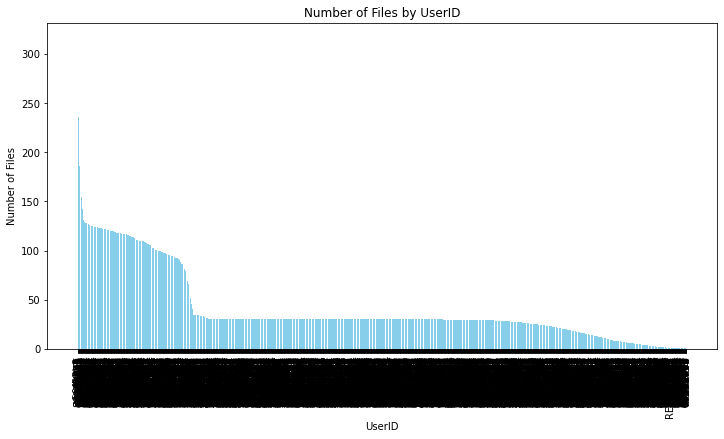

In [10]:
#plotting counts by users
plt.figure(figsize=(12, 6))
plt.bar(user_file_counts['UserID'], user_file_counts['FileCount'], color='skyblue')
plt.xlabel('UserID')
plt.ylabel('Number of Files')
plt.title('Number of Files by UserID')
plt.xticks(rotation=90)
plt.show()

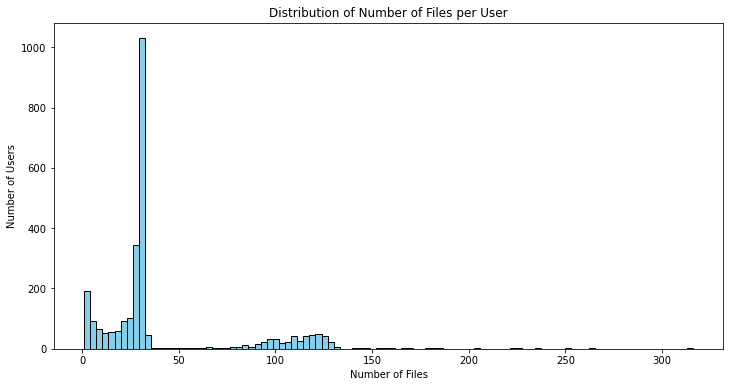

In [11]:
#plotting counts by users
plt.figure(figsize=(12, 6))
plt.hist(user_file_counts['FileCount'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Number of Files')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Files per User')
plt.show()

Lets see at the counts of files in each folder. Words like digits, yes, no, go, stop have from 3500 to 4000 files. The rest are below 2500 counts. We might want to use words with hugher counts so our model has more data to process.

In [12]:
folder_counts = files_df['Folder'].value_counts().reset_index()
folder_counts.columns = ['Folder', 'FolderCount']
folder_counts

,Folder,FolderCount
0,five,4052
1,zero,4052
2,yes,4044
3,seven,3998
4,no,3941
5,nine,3934
6,down,3917
7,one,3890
8,two,3880
9,go,3880


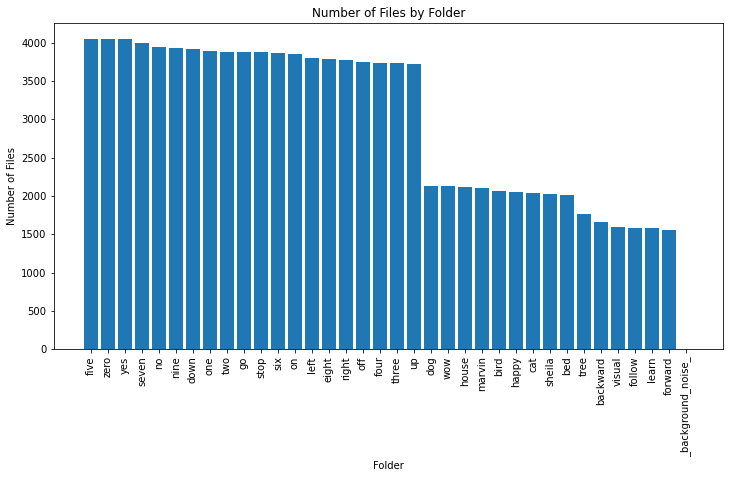

In [13]:
#plotting files by folder
plt.figure(figsize=(12, 6))
plt.bar(folder_counts['Folder'], folder_counts['FolderCount'])
plt.xlabel('Folder')
plt.ylabel('Number of Files')
plt.title('Number of Files by Folder')
plt.xticks(rotation=90)
plt.show()

## Lets take a look at a WAV file

A WAV (Waveform Audio File Format) file is a standard audio file format used to store audio data.

We will take one random file and explore what characteristics it has and how we can use it for future modeling.

In [14]:
#pick one file
file_path = 'data_raw/backward/0a2b400e_nohash_1.wav'

In [15]:
#load the .wav file
waveform, sample_rate = torchaudio.load(file_path)

In [16]:
#print size, sample rate
print(waveform)
print(waveform.shape)
print(sample_rate)

tensor([[6.1035e-05, 9.1553e-05, 6.1035e-05,  ..., 3.3569e-04, 4.5776e-04,
         1.2207e-04]])
torch.Size([1, 16000])
16000


In [18]:
import wave
# Open the WAV file using the wave module
with wave.open(file_path, 'r') as wav_file:
    # Extract basic metadata
    num_channels = wav_file.getnchannels()  # Number of audio channels
    sample_width = wav_file.getsampwidth()  # Bit depth (in bytes)
    sample_rate = wav_file.getframerate()   # Sample rate (samples per second)
    num_frames = wav_file.getnframes()      # Total number of frames (samples per channel)
    duration = num_frames / float(sample_rate)  # Duration of the audio in seconds

# Convert bit depth from bytes to bits
bit_depth = sample_width * 8

# Get the file size in bytes
file_size = os.path.getsize(file_path)

# Print the extracted metadata
print(f"File: {file_path}")
print(f"Sample Rate: {sample_rate} Hz")
print(f"Bit Depth: {bit_depth} bits")
print(f"Number of Channels: {num_channels}")
print(f"Duration: {duration:.2f} seconds")
print(f"File Size: {file_size} bytes")

File: data_raw/backward/0a2b400e_nohash_1.wav
Sample Rate: 16000 Hz
Bit Depth: 16 bits
Number of Channels: 1
Duration: 1.00 seconds
File Size: 32044 bytes


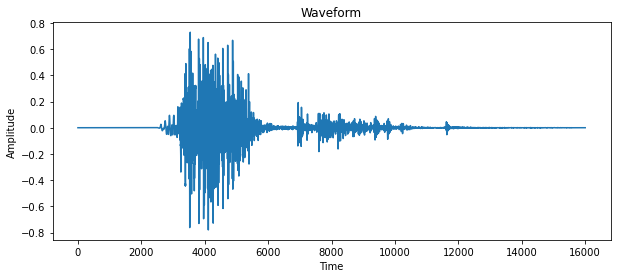

In [19]:
waveform_np = waveform.squeeze().numpy()

# Plot the waveform using waveshow
plt.figure(figsize=(10, 4))
plt.plot(waveform_np)
plt.title('Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [20]:
mel_spectrogram_transform = T.MelSpectrogram(sample_rate=8000, n_mels=128)
mel_spectrogram = mel_spectrogram_transform(waveform)

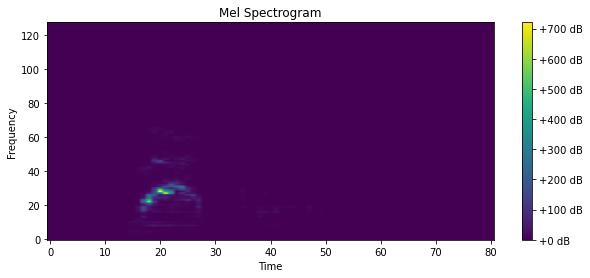

In [21]:
mel_spectrogram_np = mel_spectrogram.squeeze().numpy()

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(mel_spectrogram_np, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

## Data Preprocessing

For our project we had to decide on choice of input: **Waveform vs. Mel Spectrogram.**

After reseacrh, we decided to use the raw waveform of the audio signals as the input representation instead of converting the audio to Mel spectrograms. Key reasons for this choice:
* Preserves Raw Data: Using the raw waveform keeps the original audio data intact, avoiding potential loss of information during conversion to a spectrogram.
* Simplicity: Raw waveforms require fewer preprocessing steps, reducing the complexity of the pipeline.
* Model Flexibility: Some modern neural networks can effectively learn features directly from raw waveforms, potentially capturing more nuanced patterns.
* Adaptability: Raw waveforms allow the model to adapt to various audio characteristics without being constrained by predefined spectrogram features.

# Modeling

## Convolutional Neural Networks

We chose a Convolutional Neural Network (CNN) for this voice verification project because of its ability to process and extract features directly from audio data. CNNs are effective at detecting patterns in waveforms, like pitch and frequency variations, which are key for distinguishing different voices, making them suitable for voice verification.

Overall, CNNs simplify feature extraction and improve accuracy without needing extensive manual work.

## Tools

We chose PyTorch for building and training our Convolutional Neural Network (CNN) because of several key reasons:

* Flexibility: PyTorch allows for easy experimentation with different model architectures, thanks to its dynamic computation graphs.
* Ease of Use: Its intuitive interface and clear syntax made implementing complex models simpler and faster.
* Python Integration: PyTorch integrates smoothly with Python libraries for data manipulation and visualization.

## System acrhitecture 

The system architecture for this voice-based client verification system consists of two main components:

* PIN Verification Module: This module processes the client's spoken 4-digit PIN. A Convolutional Neural Network (CNN) analyzes the audio waveform of the pronounced PIN and compares it to the correct PIN. The output is a binary decision (correct or incorrect).  

* Voice ID Verification Module: If the PIN is correct, the system proceeds to verify the client's identity using their voice. Another CNN analyzes the client's voice features and compares them to the stored voice profile. The system outputs a binary decision (client or non-client) based on the match.

## Target varible

In this project the target variable is a binary label indicating whether the input voice belongs to a client or not:
* 1 (or True): If the input voice is verified as belonging to a client.  
* 0 (or False): If the input voice does not belong to a client.

## Evaluation

The evaluation of the voice authentication system will focus on measuring the accuracy of both the PIN verification and voice ID verification steps. Accuracy will be the primary metric, reflecting how well the model correctly identifies valid clients and rejects non-clients. 

Additionally, for the voice ID verification step, precision, recall, and the F1-score will be used to assess the balance between false positives and false negatives.

# Model 1 - Verifying PIN with Voice

This model leverages a combination of Convolutional Neural Networks (CNNs) and Fully Connected (FC) layers to perform client verification based on audio data. 

The CNN blocks are designed to progressively capture complex patterns in the audio signal, reducing the dimensionality of the data while preserving important features. 

This is followed by FC layers that further process the features and ultimately classify the data into 10 output classes, followed by Softmax function to make the final prediction. 

The combination of FC layers with ReLU activation functions and dropout helps the model make accurate predictions while preventing overfitting.

The use of dropout layers between the FC layers helps prevent overfitting, making the model robust for generalization to new data.

![Alt text](images/Model1.jpg)

## Helper functions

In [3]:
DEVICE = torch.device("cpu")

The process_audio_folder function processes .wav audio files from a folder by loading, resampling to 8000 Hz, and normalizing their length to 8000 samples. It assigns labels. Function can limit the number of processed files. The function returns tensors for the audio samples and their corresponding labels.

Inputs:
* folder_path: Directory path of audio files.
* label: Label (Digit 0-9).
* limit: Max files to process.
* target_sr: Resample rate (default 8000 Hz).
Outputs:
* Lists of tensors for audio samples and labels.

In [4]:
def process_audio_folder(folder_path, label, limit, target_sr=8000):
    # Initialize lists to store audio samples and labels
    audio_samples = []
    labels = []

    # Loop through each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):
            # Load the audio file using torchaudio
            file_path = os.path.join(folder_path, filename)

            waveform, original_sample_rate = torchaudio.load(
                file_path
            )  # loads audio data in waveform and sample rate
            resampler = T.Resample(
                orig_freq=original_sample_rate, new_freq=target_sr
            )  # used to convert all sample rates from orig to 8000
            waveform_resampled = resampler(waveform)  # standardize all to 8000

            # Ensure waveform is exactly 8000 samples long
            if waveform_resampled.shape[1] > 8000:
                waveform_resampled = waveform_resampled[
                    :, :8000
                ]  # change to 8000 again if not
            elif waveform_resampled.shape[1] < 8000:
                padding_size = 8000 - waveform_resampled.shape[1]
                waveform_resampled = F.pad(
                    waveform_resampled, (0, padding_size)
                )  # if its shorter it fills with 0 to reach 8000

            # Add the tensor to the list of samples
            audio_samples.append(waveform_resampled)

            # Add the corresponding label
            # Convert the label to a one-hot encoded tensor
            probabilities = [0.0 for i in range(10)]
            probabilities[label] = 1.0
            label_tensor = torch.tensor(
                probabilities, dtype=torch.float32
            )  # Ensure correct tensor creation

            # Add the one-hot encoded label tensor to the list
            labels.append(label_tensor)

            if len(audio_samples) == limit:
                break

    # Stack the samples and labels into tensors
    audio_samples_tensor = torch.stack(
        audio_samples
    )  # Shape: (n_samples, n_mel_bins, n_time_steps)
    labels_tensor = torch.stack(labels)  # Shape: (n_samples,)

    return audio_samples_tensor, labels_tensor

The to_pairs function processes audio files for digits (0-9) from subfolders in a given path. It uses process_audio_folder to load, resample, and label audio samples for each digit. The function combines all digit audio samples and labels into single tensors and returns them.

Inputs:
* path: Directory containing subfolders named after digits (e.g., "zero").
* limit: Total number of audio samples to process (distributed equally across digits).  
Outputs:
* Tensors for combined audio samples and labels for all digits.

In [5]:
def to_pairs(path, limit):
    # Calculate the number of audio samples to process per digit
    digit_limit = limit // 10
    names = [
        "zero",
        "one",
        "two",
        "three",
        "four",
        "five",
        "six",
        "seven",
        "eight",
        "nine",
    ]

    audio_samples_tensors = []
    labels_tensors = []

    # Loop through each digit and its corresponding folder name
    for index, name in enumerate(names):
        audio_samples_tensor, labels_tensor = process_audio_folder(
            f"{path}/{name}", label=index, limit=digit_limit
        )
        audio_samples_tensors.append(audio_samples_tensor)
        labels_tensors.append(labels_tensor)
    # Concatenate all audio sample tensors and label tensors
    audio_samples_tensor = torch.cat(audio_samples_tensors, dim=0)
    labels_tensor = torch.cat(labels_tensors, dim=0)
    return audio_samples_tensor, labels_tensor


NumbersDataset class is a custom PyTorch dataset that stores audio samples and their corresponding labels. It ensures that the number of audio samples matches the number of labels and allows access to individual samples and labels via indexing.

* __init__(self, audio, label): Initializes the dataset with audio and label tensors, ensuring they have the same length.
* __getitem__(self, index): Retrieves the audio sample and label at the specified index as a tuple.
* __len__(self): Returns the total number of samples in the dataset.

In [6]:
class NumbersDataset(Dataset):

    def __init__(self, audio, label):
        assert audio.size(0) == label.size(0)
        self.audio = audio
        self.label = label

    def __getitem__(self, index): 
        return (self.audio[index], self.label[index]) #tuples
    
    def __len__(self):
        return self.audio.size(dim=0) #assuming audio and label tensors are same size

## Creating Model

The BlockCNN class is a small part of a neural network that processes audio data. It has two main layers that filter and modify the data. In between these layers, it uses batch normalization to make learning stable and ReLU to activate the neurons.

The class also includes a shortcut, which takes the original input, processes it a little, and adds it back to the output of the two layers. This shortcut helps the network avoid problems during training and makes learning faster and more accurate. The final output is a combination of the original data and the processed data.

In [7]:
class BlockCNN(nn.Module):

    def __init__(self, in_channels, out_channels, kernel_size, stride, padding): 
        super().__init__()
        self.cnn1 = nn.Conv1d(in_channels ,out_channels, kernel_size, stride, padding)
        self.batchnorm1 = nn.BatchNorm1d(out_channels)
        self.relu1 = nn.ReLU()

        self.cnn2 = nn.Conv1d(out_channels, out_channels, kernel_size, stride=1, padding=1)
        self.batchnorm2 = nn.BatchNorm1d(out_channels)
        self.relu2 = nn.ReLU()

        self.shortcut_cnn = nn.Conv1d(in_channels ,out_channels, kernel_size, stride, padding)
        self.shortcut_batchnorm = nn.BatchNorm1d(out_channels)


    def forward(self, audio):
        x = self.cnn1(audio)
        x = self.batchnorm1(x)
        x = self.relu1(x)
        x = self.cnn2(x)
        x = self.batchnorm2(x)
        x = x + self.shortcut_batchnorm(self.shortcut_cnn(audio))
        x = self.relu2(x)
        return x


The NumbersModel class is designed to process audio data and classify it into one of 10 categories (digits 0-9).

* Convolutional Layers: The model starts with five convolutional blocks (using BlockCNN), which progressively reduce the size of the audio data while extracting important features.

* Fully Connected Layers: After the convolutional layers, the data is flattened and passed through four fully connected layers, each reducing the size further and using ReLU activations for non-linearity. Dropout layers are added between them to prevent overfitting.

* Final Output: The last layer outputs a prediction for one of the 10 classes.

This structure allows the model to learn patterns in the audio data and make predictions about which digit the audio represents.

In [8]:
class NumbersModel(nn.Module):

    def __init__(self):
        super().__init__()
        # [B, 1, 8000]
        self.cnn1 = BlockCNN(in_channels=1, out_channels=16, stride = 1, kernel_size= 3, padding = 1)
        # [B, 16, 8000]
        self.cnn2 = BlockCNN(in_channels=16, out_channels=32, stride = 2, kernel_size = 3, padding = 1)
        # [B, 32, 4000]
        self.cnn3 = BlockCNN(in_channels=32, out_channels=64, stride = 2, kernel_size = 3, padding = 1)
        # [B, 64, 2000]
        self.cnn4 = BlockCNN(in_channels=64, out_channels=128, stride = 2, kernel_size = 3, padding = 1)
        # [B, 128, 1000]
        self.cnn5 = BlockCNN(in_channels=128, out_channels=256, stride = 2, kernel_size = 3, padding = 1)
        # [B, 256, 500]

        self.fc1 =  nn.Linear(in_features=256 * 500, out_features=256)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout1d(p=0.5)

        self.fc2 =  nn.Linear(in_features=256, out_features=128)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout1d(p=0.5)

        self.fc3 =  nn.Linear(in_features=128, out_features=64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout1d(p=0.5)

        self.fc4 =  nn.Linear(in_features=64, out_features=10)
    
    def forward(self, audio):
        x = self.cnn1(audio)
        x = self.cnn2(x)
        x = self.cnn3(x)
        x = self.cnn4(x)
        x = self.cnn5(x)

        x = torch.reshape(x, (x.size(0), x.size(1) * x.size(2)))

        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)

        x = self.fc4(x)

        return x


## Training and evaluating the model

Evaluate function calculates accuracy by converting prediction probabilities and true labels into class labels, then compares them to determine how many predictions were correct. It returns the accuracy score.

In [9]:
def evaluate(predictions_distribution, labels_distribution):
    # predictions_distribution: [B, 10] # class per digit
    # labels_distribution: [B, 10] # class per digit

    # Convert probabilities to predicted class labels
    predictions = torch.argmax(predictions_distribution, dim=1)
    labels = torch.argmax(labels_distribution, dim=1)

    # Convert to numpy arrays for sklearn functions
    predictions_np = predictions.cpu().numpy()
    labels_np = labels.cpu().numpy()

    # Accuracy
    accuracy = accuracy_score(labels_np, predictions_np)

    # Return results as a dictionary
    return accuracy

The train_model function trains a neural network model over a specified number of epochs. It alternates between training on a dataset and evaluating on a test dataset.

* Training: For each epoch, the model processes batches of audio data, computes the loss, and updates the model parameters using backpropagation and an optimizer.
The average training loss is computed for each epoch.
* Evaluation: After training, the model is evaluated on the test dataset without updating the weights.
The test loss is computed, and predictions are made using softmax.
The accuracy of the model is calculated by comparing predictions to true labels.
* Output: After each epoch, the function prints the training loss, test loss, and accuracy.

In [10]:
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=50):
    model.train() #set model into training mode
    for epoch in range(num_epochs):
        running_loss = 0
        for audio, label in train_loader:
            # audio shape is [B, 8000]
            audio = audio.to(DEVICE)
            label = label.to(DEVICE)
          
            optimizer.zero_grad() #reset optimizer
            prediction = model(audio)
            loss = criterion(prediction, label)
            loss.backward() #calculating updates (derivatives) for weights and biases based on loss
            optimizer.step() #use updates and apply to the model
            running_loss += loss * audio.size(dim=0)

        # calculate average loss for epoch
        train_loss = running_loss / len(train_loader.dataset)


        model.eval()

        predictions = []
        labels = []

        running_loss = 0
        with torch.no_grad():
            for audio, label in test_loader:
                # audio shape is [B, 8000]
                audio = audio.to(DEVICE)
                label = label.to(DEVICE)
            
                prediction = model(audio) # [B, 10]
                loss = criterion(prediction, label) 
    
                running_loss += loss * audio.size(dim=0)

                prediction_distribution = F.softmax(prediction, dim=1)
                predictions.append(prediction_distribution)
                labels.append(label)
            

        # calculate average loss for epoch
        test_loss = running_loss / len(test_loader.dataset)

        predictions = torch.cat(predictions)  # put all predictions into a single tensor
        labels = torch.cat(labels)  # put all true labels into a single tensor
        accuracy = evaluate(predictions, labels)

        print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}')

        model.train()

Run_test function loads and splits a speech dataset, sets up a neural network model with data loaders, defines a loss function and optimizer, and trains the model for 50 epochs. It prints progress during data preparation, training, and completion.

In [20]:
def run_test(dataset_limit: int, batch_size: int, lr: int):
    # Prepare data
    print("Preparing data")
    # set a limit on the total number of pairs to be generated
    # one = read_as_dict("/root/learning-nn/resources/speech_commands/one", 1000)

    # load data into a dict from marvin folder
    audio_samples_tensor, labels_tensor = to_pairs(
        "/root/learning-nn/resources/speech_commands", dataset_limit
    )
    print(f"Read {len(audio_samples_tensor)} pairs")

    as_train, as_test, l_train, l_test = train_test_split(
        audio_samples_tensor, labels_tensor, test_size=0.2, random_state=42
    )

    # Setting up the training
    print(
        f"Running training. dataset_limit={dataset_limit}. batch_size={batch_size}. lr={lr}"
    )
    model = NumbersModel().to(DEVICE)
    train_loader = DataLoader(
        dataset=NumbersDataset(as_train, l_train), batch_size=batch_size, shuffle=True
    )
    test_loader = DataLoader(
        dataset=NumbersDataset(as_test, l_test), batch_size=batch_size, shuffle=True
    )

    # criterion = nn.BCELoss()
    criterion = nn.BCEWithLogitsLoss() #log loss, criterion for assesing classification
    optimizer = optim.Adam(model.parameters(), lr=lr)


    # Train the model
    train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=50)

    print("Finished")

## Testing the model

We now test the model in several iteration with the specified parameters to find the one that lead to best accuracy score.

In [16]:
for dataset_limit in [20000]:
    for batch_size in [32]:
        for lr in [0.0005]:
            run_test(dataset_limit, batch_size, lr)

Preparing data
Read 20000 pairs
Running training. dataset_limit=20000. batch_size=32. lr=0.0005
Epoch: 1/50, Train Loss: 0.5336, Test Loss: 0.4667, Accuracy: 0.1240
Epoch: 2/50, Train Loss: 0.4454, Test Loss: 0.4028, Accuracy: 0.2980
Epoch: 3/50, Train Loss: 0.4152, Test Loss: 0.3788, Accuracy: 0.3807
Epoch: 4/50, Train Loss: 0.3898, Test Loss: 0.3551, Accuracy: 0.3982
Epoch: 5/50, Train Loss: 0.3666, Test Loss: 0.3096, Accuracy: 0.5413
Epoch: 6/50, Train Loss: 0.3507, Test Loss: 0.2993, Accuracy: 0.6152
Epoch: 7/50, Train Loss: 0.3365, Test Loss: 0.2920, Accuracy: 0.6228
Epoch: 8/50, Train Loss: 0.3260, Test Loss: 0.2808, Accuracy: 0.5142
Epoch: 9/50, Train Loss: 0.3166, Test Loss: 0.2710, Accuracy: 0.6040
Epoch: 10/50, Train Loss: 0.3113, Test Loss: 0.2588, Accuracy: 0.7133
Epoch: 11/50, Train Loss: 0.3066, Test Loss: 0.2431, Accuracy: 0.7765
Epoch: 12/50, Train Loss: 0.3037, Test Loss: 0.2480, Accuracy: 0.7722
Epoch: 13/50, Train Loss: 0.2990, Test Loss: 0.2371, Accuracy: 0.7738
Epo

In [17]:
for dataset_limit in [38000]:
    for batch_size in [32]:
        for lr in [0.0005]:
            run_test(dataset_limit, batch_size, lr)

Preparing data
Read 37842 pairs
Running training. dataset_limit=38000. batch_size=32. lr=0.0005
Epoch: 1/50, Train Loss: 0.5012, Test Loss: 0.4437, Accuracy: 0.2431
Epoch: 2/50, Train Loss: 0.4134, Test Loss: 0.3668, Accuracy: 0.3747
Epoch: 3/50, Train Loss: 0.3681, Test Loss: 0.3149, Accuracy: 0.5604
Epoch: 4/50, Train Loss: 0.3394, Test Loss: 0.2891, Accuracy: 0.5530
Epoch: 5/50, Train Loss: 0.3208, Test Loss: 0.2928, Accuracy: 0.4352
Epoch: 6/50, Train Loss: 0.3099, Test Loss: 0.2596, Accuracy: 0.7321
Epoch: 7/50, Train Loss: 0.3036, Test Loss: 0.2462, Accuracy: 0.7294
Epoch: 8/50, Train Loss: 0.3004, Test Loss: 0.2457, Accuracy: 0.7769
Epoch: 9/50, Train Loss: 0.2987, Test Loss: 0.2340, Accuracy: 0.8165
Epoch: 10/50, Train Loss: 0.2963, Test Loss: 0.2349, Accuracy: 0.7659
Epoch: 11/50, Train Loss: 0.2963, Test Loss: 0.2221, Accuracy: 0.8179
Epoch: 12/50, Train Loss: 0.2945, Test Loss: 0.2255, Accuracy: 0.8171
Epoch: 13/50, Train Loss: 0.2940, Test Loss: 0.2150, Accuracy: 0.8374
Epo

In [18]:
for dataset_limit in [38000]:
    for batch_size in [64]:
        for lr in [0.001]:
            run_test(dataset_limit, batch_size, lr)

Preparing data
Read 37842 pairs
Running training. dataset_limit=38000. batch_size=64. lr=0.001
Epoch: 1/50, Train Loss: 0.5041, Test Loss: 0.4310, Accuracy: 0.2039
Epoch: 2/50, Train Loss: 0.4153, Test Loss: 0.3797, Accuracy: 0.2957
Epoch: 3/50, Train Loss: 0.3725, Test Loss: 0.3221, Accuracy: 0.4995
Epoch: 4/50, Train Loss: 0.3447, Test Loss: 0.3053, Accuracy: 0.4459
Epoch: 5/50, Train Loss: 0.3262, Test Loss: 0.2771, Accuracy: 0.6594
Epoch: 6/50, Train Loss: 0.3135, Test Loss: 0.2652, Accuracy: 0.5657
Epoch: 7/50, Train Loss: 0.3063, Test Loss: 0.2480, Accuracy: 0.7573
Epoch: 8/50, Train Loss: 0.3011, Test Loss: 0.2541, Accuracy: 0.6977
Epoch: 9/50, Train Loss: 0.2990, Test Loss: 0.2461, Accuracy: 0.7561
Epoch: 10/50, Train Loss: 0.2988, Test Loss: 0.2514, Accuracy: 0.7280
Epoch: 11/50, Train Loss: 0.2972, Test Loss: 0.2399, Accuracy: 0.7853
Epoch: 12/50, Train Loss: 0.2964, Test Loss: 0.2524, Accuracy: 0.7551
Epoch: 13/50, Train Loss: 0.2977, Test Loss: 0.2396, Accuracy: 0.7696
Epoc

In [19]:
for dataset_limit in [38000]:
    for batch_size in [64]:
        for lr in [0.0005]:
            run_test(dataset_limit, batch_size, lr)

Preparing data
Read 37842 pairs
Running training. dataset_limit=38000. batch_size=64. lr=0.0005
Epoch: 1/50, Train Loss: 0.5440, Test Loss: 0.4551, Accuracy: 0.2323
Epoch: 2/50, Train Loss: 0.4545, Test Loss: 0.4142, Accuracy: 0.3448
Epoch: 3/50, Train Loss: 0.4190, Test Loss: 0.3561, Accuracy: 0.3356
Epoch: 4/50, Train Loss: 0.3911, Test Loss: 0.3113, Accuracy: 0.6564
Epoch: 5/50, Train Loss: 0.3674, Test Loss: 0.3113, Accuracy: 0.4966
Epoch: 6/50, Train Loss: 0.3505, Test Loss: 0.3048, Accuracy: 0.4768
Epoch: 7/50, Train Loss: 0.3342, Test Loss: 0.2841, Accuracy: 0.5231
Epoch: 8/50, Train Loss: 0.3259, Test Loss: 0.2680, Accuracy: 0.5737
Epoch: 9/50, Train Loss: 0.3151, Test Loss: 0.2549, Accuracy: 0.6994
Epoch: 10/50, Train Loss: 0.3110, Test Loss: 0.2476, Accuracy: 0.6648
Epoch: 11/50, Train Loss: 0.3036, Test Loss: 0.2221, Accuracy: 0.8070
Epoch: 12/50, Train Loss: 0.3004, Test Loss: 0.2185, Accuracy: 0.8132
Epoch: 13/50, Train Loss: 0.2975, Test Loss: 0.2290, Accuracy: 0.7968
Epo

# Model 2 - Verifying Client ID with Voice

This model leverages a series of Convolutional Neural Networks (CNNs) followed by Fully Connected (FC) layers to process and compare two audio inputs. The CNN blocks progressively extract and reduce the dimensionality of audio features, ensuring the most important patterns are retained.

After processing the two inputs separately through the CNN layers, their outputs are flattened and concatenated to form a combined feature representation. This merged data is then passed through FC layers, which further refine the features and classify the relationship between the two inputs.

ReLU activation functions and dropout layers in the FC layers enhance the model's ability to learn non-linear relationships while reducing overfitting. Finally, the Sigmoid function produces a binary output, indicating the model's confidence in the prediction. This architecture is well-suited for tasks like binary classification, where the goal is to determine whether the two audio inputs are similar or different.

![Alt text](images/Model2.jpg)

## Helper Functions

The to_positive_triples function generates positive pairs (triples with label) of audio samples from users. It takes a dictionary of user-to-audio mappings and a limit on the number of pairs. For each user, it creates up to 5 pairs of matching audio samples, labels them as positive (1.0), and stores them in a list. The pairs are then shuffled and limited to the specified number before returning.

In [28]:
def to_positive_triples(
    user_to_audio, limit
):  # new function that takes dict and limit number of rows for matching samples
    # construct queue of user samples
    triples = []  # empty list to store all pairs
    for user, audios in user_to_audio.items():  # loop through each user's audio samples
        user_triples = []  # list to hold pairs for current user in the loop
        for i in range(len(audios)):  # loop through each audio sample
            for j in range(i + 1, len(audios)):  # loop thorugh next audio samples
                if len(user_triples) < 5:  # set limit to 5 pairs per users
                    user_triples.append(
                        (audios[i], audios[j], torch.tensor([1.0], dtype=torch.float32))
                    )  # add to list and put label 1
                else:  # ?if list is full
                    break  # ?break the cycle
            if len(user_triples) >= limit:  # ?
                break
        triples.extend(user_triples)  # add user pairs to the main list

    random.Random(42).shuffle(triples)  # randomly shuffle all paris

    return triples[:limit]  # ?return limited number of pairs

The to_negative_triples function generates negative pairs of audio samples, where the samples come from different users. It takes a dictionary of user-to-audio mappings and a limit on the number of pairs. The function creates two shuffled lists of user-audio pairs and compares them to ensure the pairs are from different users. These pairs are labeled as negative (0.0) and stored in a list of triples. The function stops once the specified limit is reached and returns the list of negative pairs.

In [30]:
def to_negative_triples(user_to_audio, limit):  # set fnction to create negative pairs
    neg_triples = []  # empty list to sore

    # construct queue of user samples
    index_user_sample = []  # to hold user pairs
    for user, audios in user_to_audio.items():  # loop through users
        for audio in audios:  # loop through audios
            index_user_sample.append((user, audio))  # store pairs in the list

    queue1 = list(index_user_sample)  # copy user audio list
    random.Random(42).shuffle(queue1)  # randomly shuffle new list

    queue2 = list(index_user_sample)  # another copy of user audio list
    random.Random(24).shuffle(queue2)  # randomly shuffle new list

    for i in range(len(queue1)):  # loop through queue lists
        if queue1[i][0] != queue2[i][0]:  # check if users are same
            neg_triples.append(
                (queue1[i][1], queue2[i][1], torch.tensor([0.0], dtype=torch.float32))
            )  # add a pair if they are not same and set label 0

            if len(neg_triples) == limit:  # break if list hit limit
                break

    return neg_triples  # return list with negative pairs

The process_audio_folder function processes audio files in a folder and organizes them by user. It resamples all audio files to 8000 Hz and ensures they are exactly 8000 samples long. The function extracts user IDs from the filenames and groups the audio files by user in a dictionary. 

It then creates positive and negative pairs (triples with labels) of audio samples using the to_positive_triples and to_negative_triples functions, splitting the total number of pairs equally between positive and negative. Finally, it returns the positive and negative triples.

In [31]:
def process_audio_folder(path, limit):  # create new function with two arguments
    result = {}  # empty dictionary

    for filename in os.listdir(
        path
    ):  # start loop for all files in the path, lists all files
        if filename == ".DS_Store":  # skips system file
            continue
        file_path = os.path.join(
            path, filename
        )  # creates new var of path and name of the file
        # print(f"Processing file: {file_path}") #used for checking the process

        waveform, original_sample_rate = torchaudio.load(
            file_path
        )  # loads audio data in waveform and sample rate
        resampler = T.Resample(
            orig_freq=original_sample_rate, new_freq=8000
        )  # used to convert all sample rates from orig to 8000
        waveform_resampled = resampler(waveform)  # standardize all to 8000

        # Ensure waveform is exactly 8000 samples long
        if waveform_resampled.shape[1] > 8000:
            waveform_resampled = waveform_resampled[
                :, :8000
            ]  # change to 8000 again if not
        elif waveform_resampled.shape[1] < 8000:
            padding_size = 8000 - waveform_resampled.shape[1]
            waveform_resampled = F.pad(
                waveform_resampled, (0, padding_size)
            )  # if its shorter it fills with 0 to reach 8000

        username = filename.split("_")[0]  # extract userid from file name
        if username in result:
            result[username].append(
                waveform_resampled
            )  # if user exist in dictionary, add file to it
        else:
            result[username] = [waveform_resampled]  # add user and file into dict
        if len(result) >= limit:  # stop if dict hits the limit per user
            break

    positive_triples = to_positive_triples(result, limit=int(limit * 0.5))
    negative_triples = to_negative_triples(result, limit=int(limit * 0.5))
    return positive_triples, negative_triples

The to_triples function generates positive and negative triples (pairs of audio samples with labels) for digit audio data from a given path. It processes each digit's audio files by calling the process_audio_folder function, which generates both positive and negative triples for that digit. The results from all digits are combined into two lists: one for positive triples and one for negative triples. The function returns both lists.

In [33]:
def to_triples(path, limit):
    digit_limit = limit // 10
    digits = [
        "zero",
        "one",
        "two",
        "three",
        "four",
        "five",
        "six",
        "seven",
        "eight",
        "nine",
    ]

    all_positive_triples = []
    all_negative_triples = []

    for digit in digits:
        positive_triples, negative_triples = process_audio_folder(
            f"{path}/{digit}", limit=digit_limit
        )
        all_positive_triples.extend(positive_triples)
        all_negative_triples.extend(negative_triples)

    return all_positive_triples, all_negative_triples

The evaluate function calculates performance metrics for binary classification predictions.

In [35]:
def evaluate(predictions, labels):
    true_positives = (
        torch.logical_and(predictions >= 0.5, labels == 1).sum().item()
    )  # calculate true positives
    false_positives = (
        torch.logical_and(predictions >= 0.5, labels == 0).sum().item()
    )  # calculate false positives
    true_negatives = (
        torch.logical_and(predictions < 0.5, labels == 0).sum().item()
    )  # calculate true negatives
    false_negatives = (
        torch.logical_and(predictions < 0.5, labels == 1).sum().item()
    )  # calculate false negatives

    # calculate precision: the ratio of true positives to the total predicted positives
    precision = (
        true_positives / (true_positives + false_positives)
        if true_positives + false_positives > 0
        else 0
    )

    # calculate recall: the ratio of true positives to the total actual positives
    recall = (
        true_positives / (true_positives + false_negatives)
        if true_positives + false_negatives > 0
        else 0
    )

    # calculate F1 score: the harmonic mean of precision and recall
    f1_score = (
        2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    )

    # calculate accuracy: the ratio of correct predictions (true positives + true negatives) to the total predictions
    accuracy = (
        (true_positives + true_negatives)
        / (true_positives + false_positives + true_negatives + false_negatives)
        if true_positives + false_positives + true_negatives + false_negatives > 0
        else 0
    )

    # return results
    return precision, recall, f1_score, accuracy

The load_data function prepares and loads a dataset for training and testing. It supports caching to avoid reprocessing the data repeatedly.

In [36]:
def load_data(limit: int, cache_dir: str = None):
    cache_file = None
    if cache_dir:
        os.makedirs(cache_dir, exist_ok=True)
        cache_file = os.path.join(cache_dir, f"data_limit_{limit}.pkl")

    if cache_file and os.path.exists(cache_file):
        print(f"Loading data from cache: {cache_file}")
        with open(cache_file, "rb") as f:
            train, test = pickle.load(f)
    else:
        # Prepare data
        print("Preparing data")
        positive_triples, negative_triples = to_triples(
            "/root/learning-nn/resources/speech_commands/", limit
        )

        print(f"Read {len(positive_triples)} positive_pairs")
        print(f"Read {len(negative_triples)} negative_pairs")

        p_train, p_test = train_test_split(
            positive_triples, test_size=0.2, random_state=42
        )
        n_train, n_test = train_test_split(
            negative_triples, test_size=0.2, random_state=42
        )

        train = p_train + n_train
        test = p_test + n_test
        random.Random(42).shuffle(train)
        random.Random(42).shuffle(test)

        if cache_file:
            print(f"Saving data to cache: {cache_file}")
            with open(cache_file, "wb") as f:
                pickle.dump((train, test), f)

    return train, test

In [37]:
class VoiceDataset(Dataset):
    def __init__(self, list_triple):
        self.list_triple = list_triple

    def __getitem__(self, index):
        return self.list_triple[index]
    
    def __len__(self):
        return len(self.list_triple)

## Creating Model

BlockCNN class is a convolutional neural network (CNN) block designed to process 1D audio data. It consists of two convolutional layers with batch normalization and ReLU activation, along with a shortcut connection to improve learning. After the convolutional operations, the block applies max pooling to reduce the dimensionality of the data.

In [47]:
class BlockCNN(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=kernel_size, stride=1, padding=padding)
        self.batchnorm1 = nn.BatchNorm1d(out_channels)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=kernel_size, stride=1, padding=padding)
        self.batchnorm2 = nn.BatchNorm1d(out_channels)

        self.shortcut_batchnorm = nn.BatchNorm1d(out_channels)
        self.shortcut_conv = nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=1)

        self.relu2 = nn.ReLU()

        self.maxpooling = nn.MaxPool1d(kernel_size=kernel_size, stride=stride, padding=padding)

    def forward(self, audio):
        x = self.conv1(audio)
        x = self.batchnorm1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.batchnorm2(x)

        x = x + self.shortcut_batchnorm(self.shortcut_conv(audio))

        x = self.relu2(x)
        x = self.maxpooling(x)

        return x

VoiceModel class is designed for comparing two audio inputs. The model processes both inputs through a series of convolutional blocks and then combines the results to make a binary prediction.

* CNN Layers: Four BlockCNN layers process each audio input independently, extracting features and reducing dimensionality.
* Flatten and Concatenate: After processing, the outputs of both inputs are flattened and concatenated into a single feature vector.
* Fully Connected Layers: Two fully connected layers further process the concatenated features, with ReLU activation and dropout to prevent overfitting.
* Sigmoid Activation: The final layer applies a sigmoid function, outputting a probability between 0 and 1, indicating the similarity or match between the two audio inputs.

In [48]:
class VoiceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn1 = BlockCNN(in_channels=1, out_channels=4, stride=5)
        self.cnn2 = BlockCNN(in_channels=4, out_channels=8, stride=5)
        self.cnn3 = BlockCNN(in_channels=8, out_channels=16, stride=5)
        self.cnn4 = BlockCNN(in_channels=16, out_channels=32, stride=4)

        self.fc1 = nn.Linear(in_features=32 * 16 * 2, out_features=16)
        self.fc2 = nn.Linear(in_features=16, out_features=1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout1d(p=0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, audio1, audio2):
        x1 = self.cnn1(audio1)
        x1 = self.cnn2(x1)
        x1 = self.cnn3(x1)
        x1 = self.cnn4(x1)

        x2 = self.cnn1(audio2)
        x2 = self.cnn2(x2)
        x2 = self.cnn3(x2)
        x2 = self.cnn4(x2)

        x1 = torch.flatten(x1, start_dim=1)
        x2 = torch.flatten(x2, start_dim=1)

        x = torch.cat((x1, x2), 1)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.sigmoid(x)

        return x

## Training and evaluating the model

In [49]:
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0
        for audio1, audio2, label in train_loader:
            optimizer.zero_grad()

            audio1 = audio1.to(DEVICE)
            audio2 = audio2.to(DEVICE)
            label = label.to(DEVICE)

            prediction = model(audio1, audio2)
            loss = criterion(prediction, label)
            loss.backward()

            optimizer.step()

            running_loss += loss * audio1.size(0)

        train_loss = running_loss / len(train_loader.dataset)

        model.eval()

        predictions = []
        labels = []

        running_loss = 0
        with torch.no_grad():
            for audio1, audio2, label in test_loader:
                audio1 = audio1.to(DEVICE)
                audio2 = audio2.to(DEVICE)
                label = label.to(DEVICE)

                prediction = model(audio1, audio2)
                loss = criterion(prediction, label) 
    
                running_loss += loss * audio1.size(dim=0)

                predictions.append(prediction)
                labels.append(label)

        test_loss = running_loss / len(test_loader.dataset)

        predictions = torch.cat(predictions) 
        labels = torch.cat(labels) 
        precision, recall, f1_score, accuracy = evaluate(predictions, labels)


        print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}')

        model.train()

Run_test function sets up and trains a VoiceModel using the provided training and testing data. It configures the model, data loaders, loss function, and optimizer, and then trains the model for a specified number of epochs.

In [50]:
def run_test(
    train,
    test,
    dataset_limit: int,
    batch_size: int,
    lr: int,
    epochs: int,
    weight_decay: float,
):
    # Setting up the training
    print(
        f"Running training. dataset_limit={dataset_limit}. batch_size={batch_size}. lr={lr}. epochs={epochs}. weight_decay={weight_decay}"
    )
    model = VoiceModel().to(DEVICE)
    train_loader = DataLoader(
        dataset=VoiceDataset(train), batch_size=batch_size, shuffle=True
    )
    test_loader = DataLoader(
        dataset=VoiceDataset(test), batch_size=batch_size, shuffle=True
    )

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Train the model
    train_model(
        model, train_loader, test_loader, criterion, optimizer, num_epochs=epochs
    )

    print("Finished")

## Testing the model

We now test the model in several iteration with the specified parameters to find the one that lead to best accuracy score.

In [52]:
for epochs in [50]:
    for dataset_limit in [30000]:
        train, test = load_data(
            dataset_limit, cache_dir="/root/learning-nn/resources/cache"
        )
        for lr in [0.001]:
            for weight_decay in [0.001]:
                for batch_size in [64]:
                    run_test(train, test, dataset_limit, batch_size, lr, epochs, weight_decay)

Loading data from cache: /root/learning-nn/resources/cache/data_limit_30000.pkl
Running training. dataset_limit=30000. batch_size=64. lr=0.001. epochs=50. weight_decay=0.001
Epoch: 1/50, Train Loss: 0.6510, Test Loss: 0.5933, Accuracy: 0.7207
Epoch: 2/50, Train Loss: 0.6244, Test Loss: 0.5861, Accuracy: 0.7320
Epoch: 3/50, Train Loss: 0.6197, Test Loss: 0.5946, Accuracy: 0.7123
Epoch: 4/50, Train Loss: 0.6108, Test Loss: 0.5609, Accuracy: 0.7428
Epoch: 5/50, Train Loss: 0.6017, Test Loss: 0.5366, Accuracy: 0.7527
Epoch: 6/50, Train Loss: 0.6008, Test Loss: 0.5390, Accuracy: 0.7547
Epoch: 7/50, Train Loss: 0.5962, Test Loss: 0.5528, Accuracy: 0.7495
Epoch: 8/50, Train Loss: 0.5956, Test Loss: 0.5394, Accuracy: 0.7537
Epoch: 9/50, Train Loss: 0.5917, Test Loss: 0.5422, Accuracy: 0.7610
Epoch: 10/50, Train Loss: 0.5827, Test Loss: 0.5045, Accuracy: 0.7858
Epoch: 11/50, Train Loss: 0.5595, Test Loss: 0.4725, Accuracy: 0.8083
Epoch: 12/50, Train Loss: 0.5526, Test Loss: 0.4732, Accuracy: 0.

In [51]:
for epochs in [50]:
    for dataset_limit in [30000]:
        train, test = load_data(
            dataset_limit, cache_dir="/root/learning-nn/resources/cache"
        )
        for lr in [0.0005]:
            for weight_decay in [0.001]:
                for batch_size in [64]:
                    run_test(train, test, dataset_limit, batch_size, lr, epochs, weight_decay)

Loading data from cache: /root/learning-nn/resources/cache/data_limit_30000.pkl
Running training. dataset_limit=30000. batch_size=64. lr=0.0005. epochs=50. weight_decay=0.001
Epoch: 1/50, Train Loss: 0.6459, Test Loss: 0.5943, Accuracy: 0.7147
Epoch: 2/50, Train Loss: 0.6223, Test Loss: 0.5939, Accuracy: 0.7082
Epoch: 3/50, Train Loss: 0.6155, Test Loss: 0.5808, Accuracy: 0.7157
Epoch: 4/50, Train Loss: 0.6057, Test Loss: 0.5709, Accuracy: 0.7298
Epoch: 5/50, Train Loss: 0.6047, Test Loss: 0.5544, Accuracy: 0.7317
Epoch: 6/50, Train Loss: 0.6015, Test Loss: 0.5560, Accuracy: 0.7260
Epoch: 7/50, Train Loss: 0.5902, Test Loss: 0.5460, Accuracy: 0.7345
Epoch: 8/50, Train Loss: 0.5666, Test Loss: 0.4723, Accuracy: 0.7975
Epoch: 9/50, Train Loss: 0.5432, Test Loss: 0.4563, Accuracy: 0.8075
Epoch: 10/50, Train Loss: 0.5335, Test Loss: 0.4396, Accuracy: 0.8318
Epoch: 11/50, Train Loss: 0.5278, Test Loss: 0.4241, Accuracy: 0.8405
Epoch: 12/50, Train Loss: 0.5140, Test Loss: 0.4049, Accuracy: 0

In [53]:
for epochs in [50]:
    for dataset_limit in [30000]:
        train, test = load_data(
            dataset_limit, cache_dir="/root/learning-nn/resources/cache"
        )
        for lr in [0.0005]:
            for weight_decay in [0.0005]:
                for batch_size in [64]:
                    run_test(train, test, dataset_limit, batch_size, lr, epochs, weight_decay)

Loading data from cache: /root/learning-nn/resources/cache/data_limit_30000.pkl
Running training. dataset_limit=30000. batch_size=64. lr=0.0005. epochs=50. weight_decay=0.0005
Epoch: 1/50, Train Loss: 0.6529, Test Loss: 0.5964, Accuracy: 0.7262
Epoch: 2/50, Train Loss: 0.6229, Test Loss: 0.5755, Accuracy: 0.7347
Epoch: 3/50, Train Loss: 0.6085, Test Loss: 0.5543, Accuracy: 0.7458
Epoch: 4/50, Train Loss: 0.5991, Test Loss: 0.5318, Accuracy: 0.7627
Epoch: 5/50, Train Loss: 0.5720, Test Loss: 0.5008, Accuracy: 0.7887
Epoch: 6/50, Train Loss: 0.5524, Test Loss: 0.4512, Accuracy: 0.8185
Epoch: 7/50, Train Loss: 0.5326, Test Loss: 0.4195, Accuracy: 0.8385
Epoch: 8/50, Train Loss: 0.5211, Test Loss: 0.4123, Accuracy: 0.8500
Epoch: 9/50, Train Loss: 0.5166, Test Loss: 0.3863, Accuracy: 0.8380
Epoch: 10/50, Train Loss: 0.5085, Test Loss: 0.3969, Accuracy: 0.8520
Epoch: 11/50, Train Loss: 0.5032, Test Loss: 0.4964, Accuracy: 0.7517
Epoch: 12/50, Train Loss: 0.4964, Test Loss: 0.3871, Accuracy: 

In [54]:
for epochs in [50]:
    for dataset_limit in [30000]:
        train, test = load_data(
            dataset_limit, cache_dir="/root/learning-nn/resources/cache"
        )
        for lr in [0.001]:
            for weight_decay in [0.0005]:
                for batch_size in [64]:
                    run_test(train, test, dataset_limit, batch_size, lr, epochs, weight_decay)

Loading data from cache: /root/learning-nn/resources/cache/data_limit_30000.pkl
Running training. dataset_limit=30000. batch_size=64. lr=0.001. epochs=50. weight_decay=0.0005
Epoch: 1/50, Train Loss: 0.6495, Test Loss: 0.5907, Accuracy: 0.7207
Epoch: 2/50, Train Loss: 0.6214, Test Loss: 0.5704, Accuracy: 0.7298
Epoch: 3/50, Train Loss: 0.6104, Test Loss: 0.5528, Accuracy: 0.7463
Epoch: 4/50, Train Loss: 0.6044, Test Loss: 0.5467, Accuracy: 0.7500
Epoch: 5/50, Train Loss: 0.5991, Test Loss: 0.5537, Accuracy: 0.7385
Epoch: 6/50, Train Loss: 0.5941, Test Loss: 0.5434, Accuracy: 0.7625
Epoch: 7/50, Train Loss: 0.5804, Test Loss: 0.4854, Accuracy: 0.8010
Epoch: 8/50, Train Loss: 0.5597, Test Loss: 0.4643, Accuracy: 0.8110
Epoch: 9/50, Train Loss: 0.5513, Test Loss: 0.4659, Accuracy: 0.8158
Epoch: 10/50, Train Loss: 0.5372, Test Loss: 0.4564, Accuracy: 0.8262
Epoch: 11/50, Train Loss: 0.5410, Test Loss: 0.4478, Accuracy: 0.8215
Epoch: 12/50, Train Loss: 0.5344, Test Loss: 0.4354, Accuracy: 0

In [57]:
for epochs in [50]:
    for dataset_limit in [40000]:
        train, test = load_data(
            dataset_limit, cache_dir="/root/learning-nn/resources/cache"
        )
        for lr in [0.0005]:
            for weight_decay in [0.0005]:
                for batch_size in [64]:
                    run_test(train, test, dataset_limit, batch_size, lr, epochs, weight_decay)

Loading data from cache: /root/learning-nn/resources/cache/data_limit_40000.pkl
Running training. dataset_limit=40000. batch_size=64. lr=0.0005. epochs=50. weight_decay=0.0005
Epoch: 1/50, Train Loss: 0.6494, Test Loss: 0.5965, Accuracy: 0.6960
Epoch: 2/50, Train Loss: 0.6244, Test Loss: 0.5755, Accuracy: 0.7214
Epoch: 3/50, Train Loss: 0.6091, Test Loss: 0.5503, Accuracy: 0.7496
Epoch: 4/50, Train Loss: 0.6017, Test Loss: 0.5349, Accuracy: 0.7601
Epoch: 5/50, Train Loss: 0.5924, Test Loss: 0.5310, Accuracy: 0.7715
Epoch: 6/50, Train Loss: 0.5743, Test Loss: 0.4803, Accuracy: 0.8136
Epoch: 7/50, Train Loss: 0.5430, Test Loss: 0.4459, Accuracy: 0.8281
Epoch: 8/50, Train Loss: 0.5275, Test Loss: 0.4071, Accuracy: 0.8498
Epoch: 9/50, Train Loss: 0.5112, Test Loss: 0.3915, Accuracy: 0.8601
Epoch: 10/50, Train Loss: 0.5053, Test Loss: 0.3704, Accuracy: 0.8675
Epoch: 11/50, Train Loss: 0.4983, Test Loss: 0.3641, Accuracy: 0.8720
Epoch: 12/50, Train Loss: 0.4956, Test Loss: 0.3526, Accuracy: 

In [56]:
for epochs in [50]:
    for dataset_limit in [40000]:
        train, test = load_data(
            dataset_limit, cache_dir="/root/learning-nn/resources/cache"
        )
        for lr in [0.0005]:
            for weight_decay in [0.00025]:
                for batch_size in [128]:
                    run_test(train, test, dataset_limit, batch_size, lr, epochs, weight_decay)

Preparing data
Read 20000 positive_pairs
Read 20000 negative_pairs
Saving data to cache: /root/learning-nn/resources/cache/data_limit_40000.pkl
Running training. dataset_limit=40000. batch_size=128. lr=0.0005. epochs=50. weight_decay=0.00025
Epoch: 1/50, Train Loss: 0.6580, Test Loss: 0.5886, Accuracy: 0.7212
Epoch: 2/50, Train Loss: 0.6261, Test Loss: 0.5728, Accuracy: 0.7244
Epoch: 3/50, Train Loss: 0.6146, Test Loss: 0.5641, Accuracy: 0.7406
Epoch: 4/50, Train Loss: 0.6062, Test Loss: 0.5539, Accuracy: 0.7454
Epoch: 5/50, Train Loss: 0.6033, Test Loss: 0.5444, Accuracy: 0.7528
Epoch: 6/50, Train Loss: 0.6010, Test Loss: 0.5352, Accuracy: 0.7614
Epoch: 7/50, Train Loss: 0.5944, Test Loss: 0.5268, Accuracy: 0.7692
Epoch: 8/50, Train Loss: 0.5827, Test Loss: 0.4997, Accuracy: 0.8003
Epoch: 9/50, Train Loss: 0.5531, Test Loss: 0.4618, Accuracy: 0.8193
Epoch: 10/50, Train Loss: 0.5386, Test Loss: 0.4299, Accuracy: 0.8309
Epoch: 11/50, Train Loss: 0.5268, Test Loss: 0.4157, Accuracy: 0.85

## Final Evaluation

#### Best performing PIN verification Model - Accuracy 87%
* BCEWithLogitsLoss
* Train Loss: 0.5 -> 0.28
* Test Loss: 0.44 -> 0.17  

Hyperparameters:
* dataset_limit = 38 000 
* batch_size = 32 
* lr = 0.0005 
* epochs=50


#### Best performing Voice verification Model - Accuracy 89%
* BCELoss
* Training Loss: 0.65 -> 0.42
* Test Loss: 0.59 -> 0.29

Hyperparameters:
* dataset_limit = 30 000 
* batch_size=64
* lr=0.0005
* epochs=50 
* weight_decay=0.0005




## Conclusion

Implementing voice authentication is a strategic move for Revolut, offering numerous advantages. From enhanced security and fraud prevention to improved customer trust and operational efficiency, this technology addresses critical business needs while positioning Revolut as a leader in fintech innovation. With the growing adoption of voice biometrics worldwide, now is the ideal time for Revolut to embrace this technology and provide its customers with the most secure and convenient banking experience.


## Next Steps and recommendations:
- **Create a Demo for System Flow:** Develop a working demo to showcase the entire system, from PIN verification to voice ID authentication.
- **Add More Training Data:** To enhance the model’s performance, gather additional training data, especially focusing on diverse client voices. This will improve the system's generalization and robustness in real-world scenarios.
- **Invest in Data Diversity:** Prioritize gathering diverse training data, including different accents and voice variations, to ensure the system is robust and inclusive for all clients.
- **Test System:** Conduct thorough testing of the system in different conditions to ensure it performs well across various scenarios. This includes testing with different accents, background noises, and varying voice qualities.
- **Implement the System:** After successful testing, deploy the system into the production environment.

## Demo
To run a demo version of the system:
* Fork and clon [github repo](https://github.com/dolgorp/verification) to your local machine 
* Open and run 'numbers.py' file from 'src' folder
* Open a 'link' from terminal to access a demo system
* Use audio pre-recorded audio files or record them using UI